In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import plotly.express as px

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.metrics import accuracy_score, classification_report

In [7]:
import os

In [8]:
from tqdm import tqdm

In [9]:
import cv2 

In [10]:
train_dir = 'dataset2/images/TRAIN'

In [11]:
test_dir = 'dataset2/images/TEST'

In [12]:
class_ls = os.listdir(train_dir)
img_ls = []
label_ls = []
dim = (128,128)
for i,j in enumerate(class_ls):
    sub_path = os.path.join(train_dir,j)
    
    for img in tqdm(os.listdir(sub_path)):
        if img.split(".")[1]=="jpeg":
            im = cv2.resize(cv2.imread(os.path.join(sub_path,img))/255,dim).astype(np.float32)
            img_ls.append(im)
            label_ls.append(int(i))

100%|██████████████████████████████████████████████████████████████████████████████| 2499/2499 [00:51<00:00, 48.54it/s]


In [13]:
images = np.array(img_ls)
labels = np.array(label_ls)

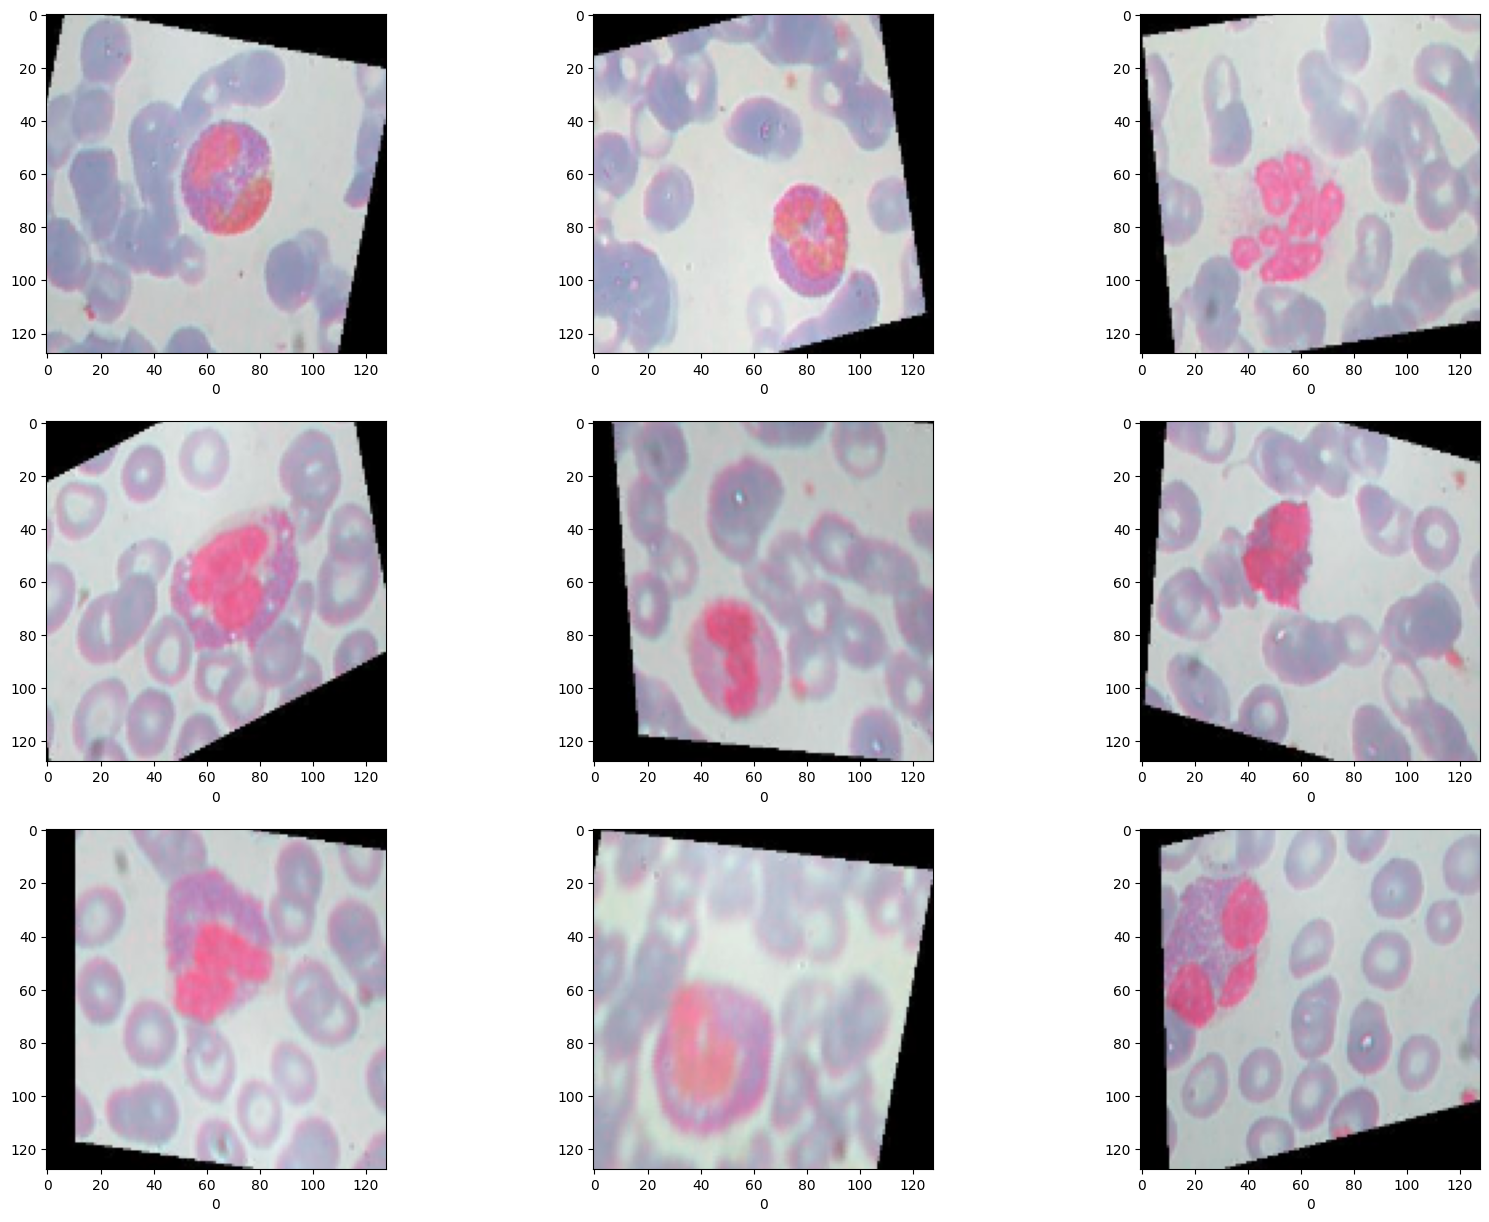

In [14]:
plt.figure(figsize=(20,15))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    plt.imshow(img_ls[i])
    plt.xlabel(label_ls[i])
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(img_ls[i+1])
    plt.xlabel(label_ls[i+1])
    
    
    plt.subplot(3,3,i+3)
    plt.imshow(img_ls[i+2])
    plt.xlabel(label_ls[i+2])

In [15]:
def read_image(filepath, cvflags = cv2.IMREAD_ANYCOLOR):
    image = []
    if(os.path.isfile(filepath)):
        try:
            image = cv2.imread(filepath, flags = cvflags)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        except Exception as e:
            print(f'Error reading image {filepath}')
            raise e
    return np.array(image)

In [16]:
def plot_image(
    image, 
    title, 
    colour_map = "gray",
    show_figure = True,
    plot_axis = None):
    
    ax = plot_axis
    if plot_axis == None:
        _, ax = plt.subplots()
        
    if colour_map == "color":
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(rgb_image)
    elif colour_map == "gray":
        ax.imshow(image, cmap = colour_map)
    else:
        raise ValueError("The colour map must be either \"color\" or \"gray\"")
        
    ax.set_title(title)
    ax.axis("off")
    if show_figure:
        plt.show()    

In [17]:
image1 = read_image(os.path.join(train_dir, "EOSINOPHIL/_0_207.jpeg"))
image2 = read_image(os.path.join(train_dir, "LYMPHOCYTE/_0_967.jpeg"))
image3 = read_image(os.path.join(train_dir, "MONOCYTE/_0_1579.jpeg"))

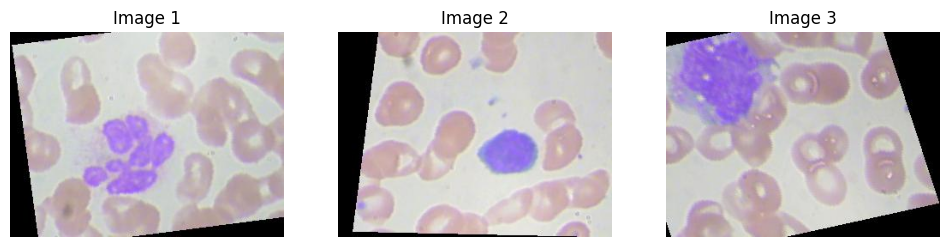

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
plot_image(image1, "Image 1", plot_axis = ax1, show_figure = False)
plot_image(image2, "Image 2", plot_axis = ax2, show_figure = False)
plot_image(image3, "Image 3", plot_axis = ax3, show_figure = False)
plt.show()

In [19]:
def plot_image_colors_histogram(
    image,
    show_figure = True, 
    plot_axis = None):
    
    ax = plot_axis
    if plot_axis == None:
        _, ax = plt.subplots()
    
    ax.hist(image.flatten(), 256, [0, 256], color = 'g')
    ax.set_xlim([0, 256])
    ax.set_title("Colors distribution")   
    ax.set_xlabel("Color intensity levels [0, 255]")
    ax.set_ylabel("Number of pixels")
    
    if show_figure:
        plt.show()

In [20]:
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

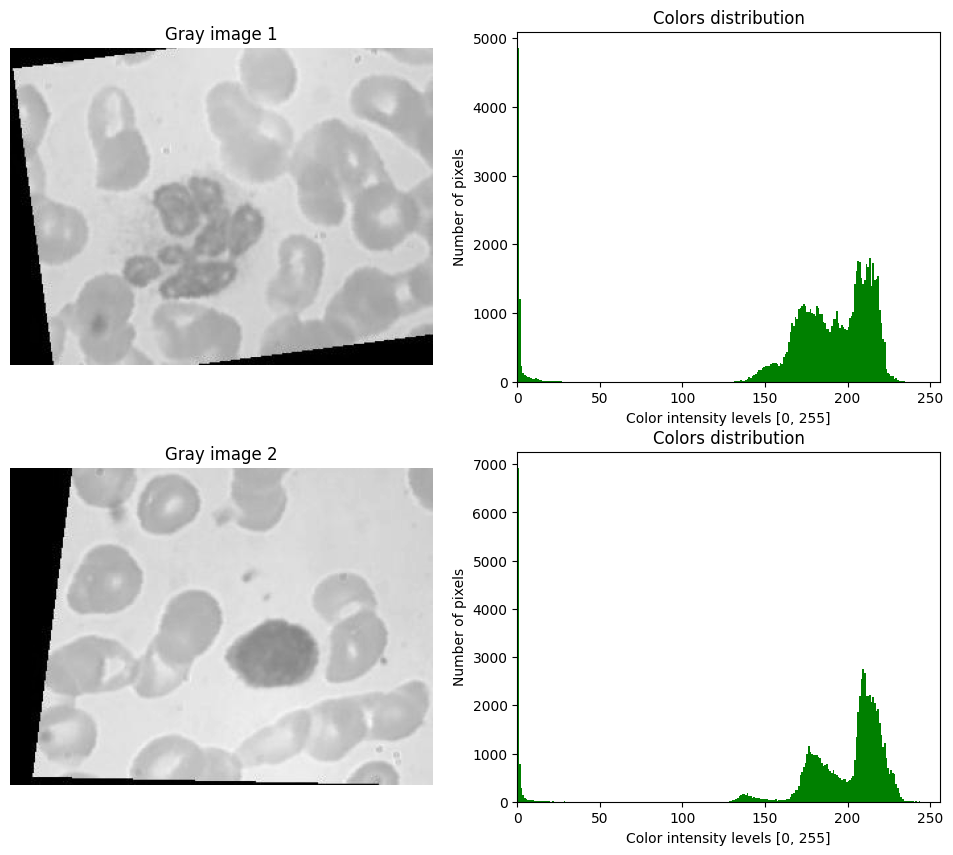

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
plot_image(gray_image1, "Gray image 1", plot_axis = ax1, show_figure = False)
plot_image_colors_histogram(gray_image1, plot_axis = ax2, show_figure = False)
plot_image(gray_image2, "Gray image 2", plot_axis = ax3, show_figure = False)
plot_image_colors_histogram(gray_image2, plot_axis = ax4, show_figure = False)
plt.show()

In [22]:
def normalize(image, new_min, new_max):
    image_min = image.min()
    image_max = image.max()
    return (image - image_min) * (new_max - new_min)/(image_max - image_min) + new_min

In [23]:
def equalize_histogram(image):
    hist, bins = np.histogram(image1.flatten(), 256, [0,256])
    cdf = np.cumsum(hist)
    cdf_mask = np.ma.masked_equal(cdf, 0) 
    cdf_mask = normalize(cdf_mask, 0, 255)
    normalized_cdf = np.ma.filled(cdf_mask, 0).astype('uint8')
    
    return normalized_cdf[image]

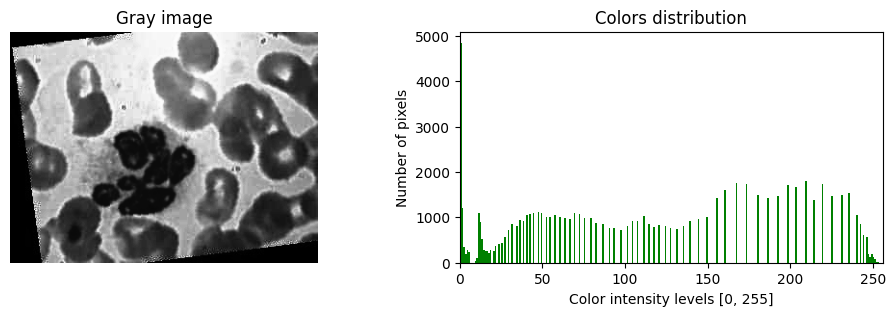

In [24]:
enhanced_image = equalize_histogram(gray_image1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
plot_image(enhanced_image, "Gray image", plot_axis = ax1, show_figure = False)
plot_image_colors_histogram(enhanced_image, plot_axis = ax2, show_figure = False)
plt.show()

In [25]:
def increase_contrast(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    l2 = clahe.apply(l)

    lab = cv2.merge((l2,a,b))
    img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR) 
    
    return img2

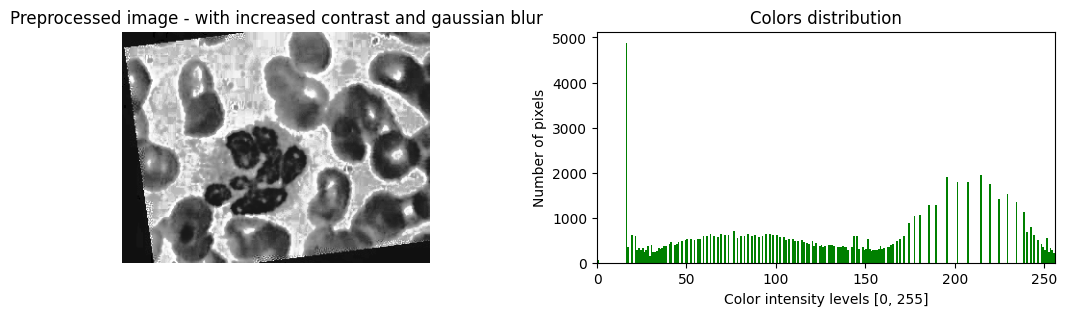

In [26]:
image1_with_increased_contrast = increase_contrast(image1)
gray_image1 = cv2.cvtColor(image1_with_increased_contrast, cv2.COLOR_RGB2GRAY)
equalized_image1 = cv2.equalizeHist(gray_image1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 3))
plot_image(equalized_image1, "Preprocessed image - with increased contrast and gaussian blur",
           show_figure = False, plot_axis = ax1)
plot_image_colors_histogram(equalized_image1, show_figure = False, plot_axis = ax2)
plt.show()

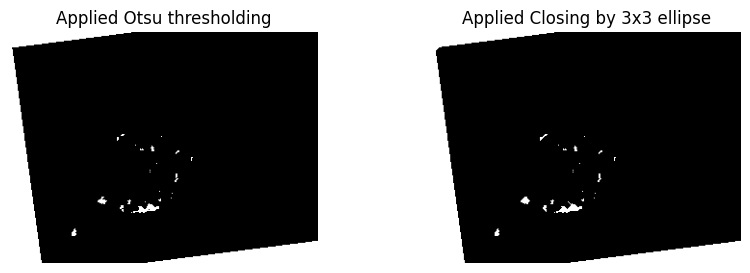

In [27]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))

otsu_threshold1, otsu_image1 = cv2.threshold(gray_image1, 0, 255,
                                             cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plot_image(otsu_image1, "Applied Otsu thresholding", plot_axis = ax1, show_figure = False)

structuring_element1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
image1_closed_otsu = cv2.morphologyEx(otsu_image1, cv2.MORPH_CLOSE, 
                                         structuring_element1, iterations = 3)
plot_image(image1_closed_otsu, "Applied Closing by 3x3 ellipse", plot_axis = ax2, show_figure = False)
plt.show()   

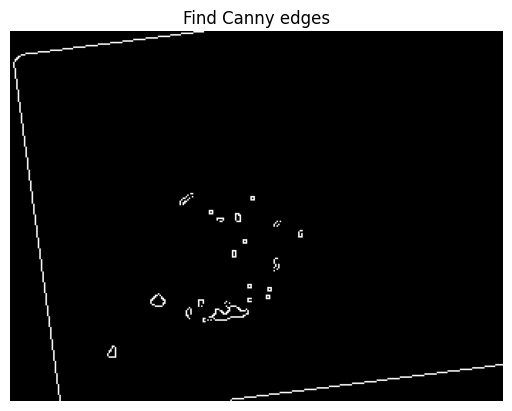

In [28]:
canny_image1 = cv2.Canny(image1_closed_otsu, otsu_threshold1, 0.5*otsu_threshold1)
plot_image(canny_image1, "Find Canny edges")  

In [29]:
class Contour:
    
    def __init__(self, contour, image):
        self.points = contour 
        
        area = cv2.contourArea(contour)
        (x, y), radius = cv2.minEnclosingCircle(contour)
        
        # enclosing circle
        enclosing_circle_center_x, enclosing_circle_center_y = (int(x), int(y))
        enclosing_circle_diameter = 2 * int(radius)
        
        # Hu moments
        [h1, h2, h3, h4, h5, h6, h7] = cv2.HuMoments(cv2.moments(contour)).flatten()
        
        self.data = {
            "area": area,
            "enclosing_circle_center_x": enclosing_circle_center_x,
            "enclosing_circle_center_y": enclosing_circle_center_y,
            "enclosing_circle_diameter": enclosing_circle_diameter,
            "h1": h1,
            "h2": h2,
            "h3": h3,
            "h4": h4,
            "h5": h5,
            "h6": h6,
            "h7": h7}

In [30]:
def draw_contours_by_edges(image, 
                           image_edges,
                           show_figure = True,
                           plot_axis = None):
    contours_with_data = []
    contours, hierarchy = cv2.findContours(image_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)    

    for cv_contour, cv_hierarchy in zip(contours, hierarchy[0]):
        contour = Contour(cv_contour, image)
        has_parent = cv_hierarchy[3] > 0
        if (contour.data["area"] > 1 and
            not(has_parent)):
            contours_with_data.append(contour)
            cv2.drawContours(image, contour.points, -1, (0, 255, 0), 3)
            cv2.circle(image,
                       (contour.data["enclosing_circle_center_x"], 
                        contour.data["enclosing_circle_center_y"]), 
                       int(contour.data["enclosing_circle_diameter"]/2),
                       (255, 0, 0), 2)
       
    plot_image(image, "Enclosing circles around possible cells", 
               show_figure = show_figure,
               plot_axis = plot_axis)
    
    return contours_with_data


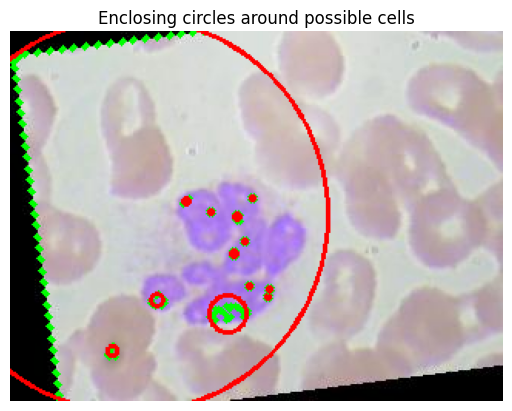

In [31]:
image1_with_contours = image1.copy()
image1_contours = draw_contours_by_edges(image1_with_contours, canny_image1)

In [32]:
def find_cell_edges(image, show_steps = True):
    image_with_increased_contrast = increase_contrast(image)
    if show_steps:
        plot_image(image_with_increased_contrast, "Image with increased contrast")
    
    gray_image = cv2.cvtColor(image_with_increased_contrast, cv2.COLOR_RGB2GRAY)
    if show_steps:
        plot_image(gray_image, "Grayscale image")
    
    smoothen_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    if show_steps:
        plot_image(smoothen_image, "Applied Gaussian Blur")
    
    otsu_threshold, otsu_image = cv2.threshold(smoothen_image, 0, 255,
                                               cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    if show_steps:
        plot_image(otsu_image, "Applied Otsu thresholding")
    
    structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    image_closed_otsu = cv2.morphologyEx(otsu_image, cv2.MORPH_CLOSE, 
                                         structuring_element, iterations = 3)
    if show_steps:
        plot_image(image_closed_otsu, "Applied Closing by 3x3 ellipse")
    
    canny_image = cv2.Canny(image_closed_otsu, otsu_threshold, 0.5*otsu_threshold)
    if show_steps:
        plot_image(canny_image, "Find Canny edges")
    
    return canny_image

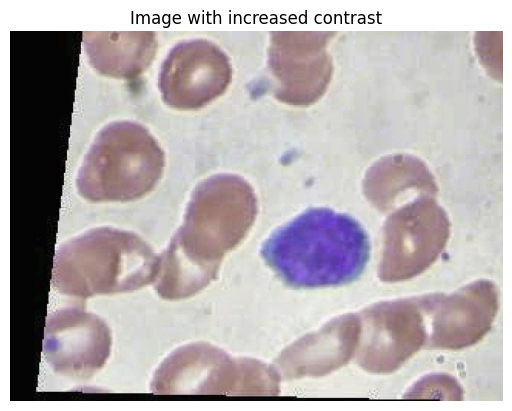

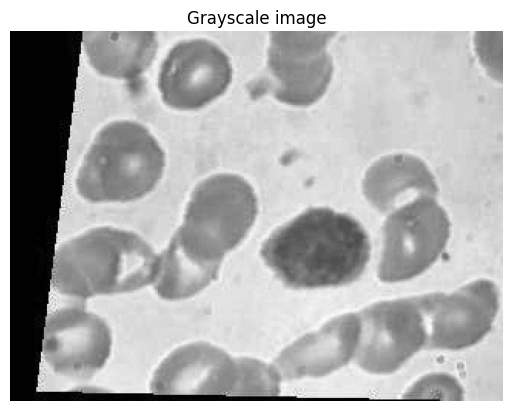

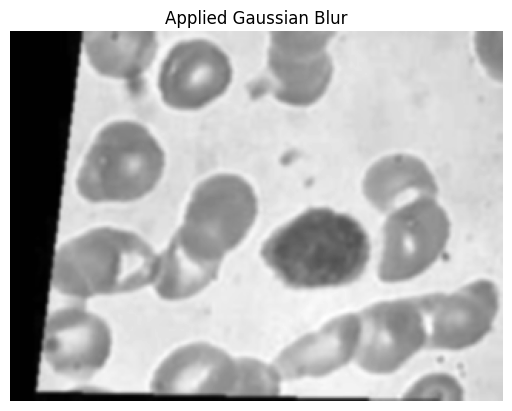

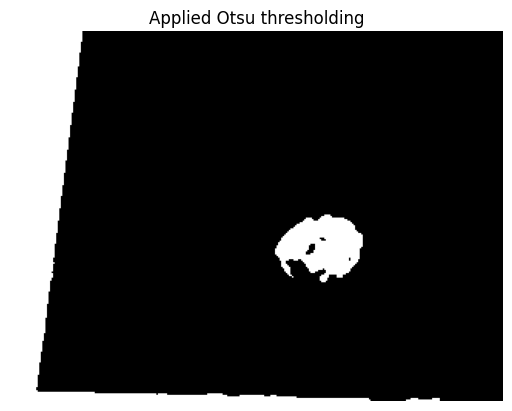

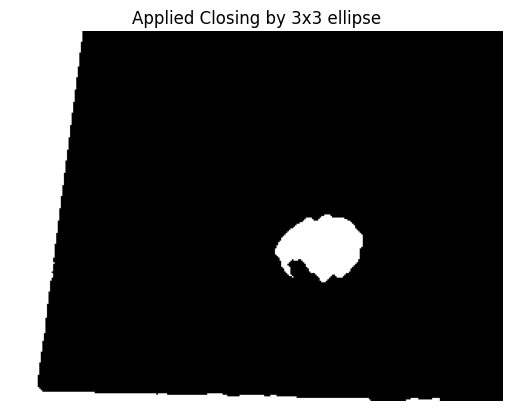

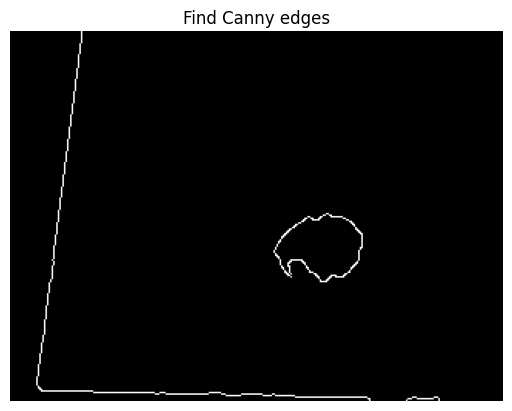

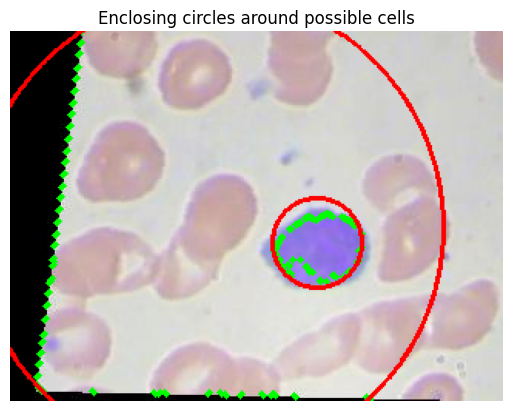

In [33]:
image2_with_defined_edges_around_cells = find_cell_edges(image2)
image2_with_contours = image2.copy()
image2_contours = draw_contours_by_edges(image2_with_contours,
                                         image2_with_defined_edges_around_cells, 
                                         show_figure = False)
plt.show()

In [34]:
def write_properties(image_contours, csv_file_name):
    
    output_file = open(csv_file_name, "w")
    output_file.write(",".join(image_contours[0].data.keys()) + "\n")

    for contour in image_contours:
        for value in contour.data.values():
            output_file.write(str(value))
            output_file.write(",")
        output_file.write("\n")

In [35]:
csv_file = os.path.join("./", "contour_features.csv")
write_properties(image1_contours, csv_file)
write_properties(image2_contours, csv_file)

In [36]:
import pandas as pd

In [37]:
contours_data = pd.read_csv(csv_file, index_col = False)
contours_data = contours_data.drop(["enclosing_circle_center_x", "enclosing_circle_center_y"], axis = 1)
print("Number of all extracted contours from image1 and image2: ", contours_data.shape[0])
contours_data.head()

Number of all extracted contours from image1 and image2:  2


area  enclosing_circle_diameter           h1            h2            h3  \
0  1693.0                         58     0.176339  3.272919e-03  2.542565e-04   
1     3.0                        304  2110.648148  4.453568e+06  3.007431e+10   

             h4            h5            h6            h7  
0  3.402183e-05  2.137891e-09  1.622624e-06  2.332805e-09  
1  3.007054e+10  9.042941e+20  6.345929e+13  1.664042e+14

In [38]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

In [39]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [40]:
train_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 7968 images belonging to 4 classes.


In [41]:
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 1989 images belonging to 4 classes.


In [42]:
test_images = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 2487 images belonging to 4 classes.


In [43]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)



In [44]:
pretrained_model.trainable = False

In [45]:
inputs = pretrained_model.input

In [46]:
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)

In [47]:
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

In [48]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [49]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [50]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

249/249 [==============================] - 130s 513ms/step - loss: 0.8091 - accuracy: 0.6609 - val_loss: 0.5612 - val_accuracy: 0.7753


In [51]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Training and Validation Loss Over Time"
)

fig.show()

In [52]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [53]:
predictions = np.argmax(model.predict(test_images), axis=1)

78/78 [==============================] - 32s 402ms/step


In [54]:
acc = accuracy_score(test_images.labels, predictions)

In [55]:
cm = tf.math.confusion_matrix(test_images.labels, predictions)

In [56]:
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

In [57]:
print("Test Accuracy: {:.3f}%".format(acc * 100))

Test Accuracy: 57.419%


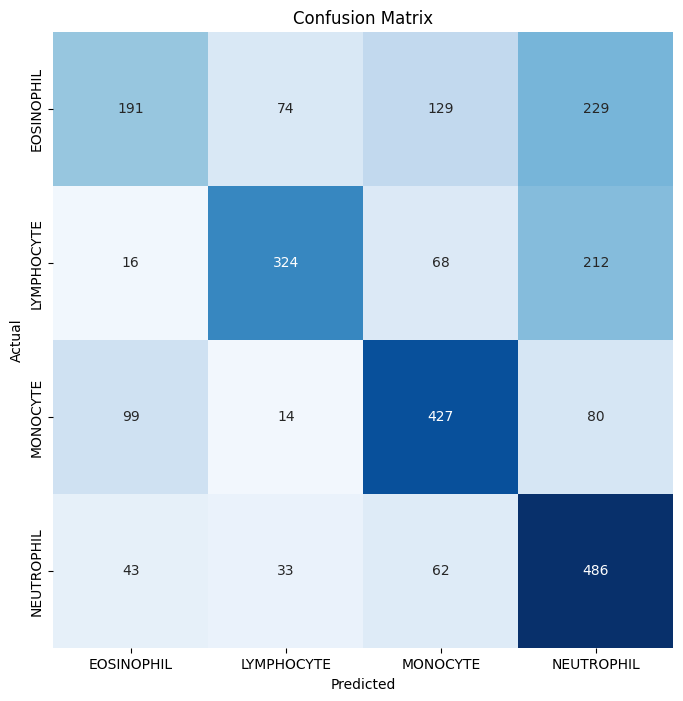

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.55      0.31      0.39       623
  LYMPHOCYTE       0.73      0.52      0.61       620
    MONOCYTE       0.62      0.69      0.65       620
  NEUTROPHIL       0.48      0.78      0.60       624

    accuracy                           0.57      2487
   macro avg       0.60      0.57      0.56      2487
weighted avg       0.59      0.57      0.56      2487



In [58]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [59]:
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)




Found 1989 images belonging to 4 classes.


In [60]:
predictions = np.argmax(model.predict(val_images), axis=1)

63/63 [==============================] - 24s 387ms/step


In [61]:
acc = accuracy_score(val_images.labels, predictions)

In [62]:
clr = classification_report(val_images.labels, predictions, target_names=CLASS_NAMES)

In [63]:
print("Validation Accuracy: {:.3f}%".format(acc * 100))

Validation Accuracy: 77.526%


<Figure size 800x800 with 0 Axes>

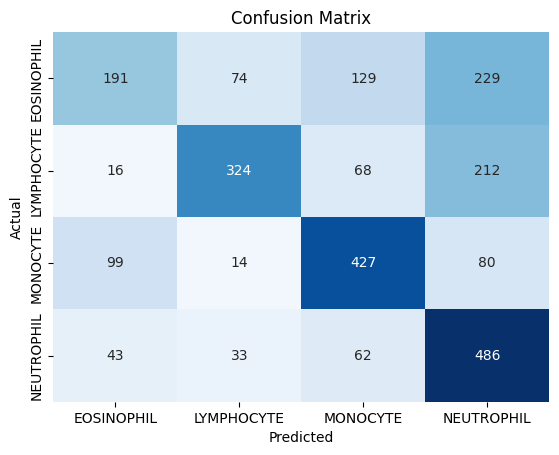

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.88      0.43      0.58       499
  LYMPHOCYTE       0.89      0.92      0.90       496
    MONOCYTE       0.77      0.94      0.85       495
  NEUTROPHIL       0.65      0.82      0.72       499

    accuracy                           0.78      1989
   macro avg       0.80      0.78      0.76      1989
weighted avg       0.80      0.78      0.76      1989



In [64]:
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)